In [1]:
import Pkg 

In [2]:
Pkg.add("CairoMakie")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Pango_jll ────────── v1.52.2+0
   Installed Formatting ───────── v0.4.3
   Installed StableHashTraits ─── v1.1.8
   Installed PikaParser ───────── v0.6.1
   Installed TupleTools ───────── v1.5.0
   Installed OffsetArrays ─────── v1.14.0
   Installed FiniteDiff ───────── v2.23.1
   Installed Polynomials ──────── v4.0.7
   Installed GroupsCore ───────── v0.4.2
   Installed AliasTables ──────── v1.0.0
   Installed ArrayInterface ───── v7.10.0
   Installed DataStructures ───── v0.18.20
   Installed GeoInterface ─────── v1.3.4
   Installed IntervalArithmetic ─ v0.22.11
   Installed Distributions ────── v0.25.108
  No Changes to `~/Documents/Programming/t_value_experiments/Project.toml`
    Updating `~/Documents/Programming/t_value_experiments/Manifest.toml`
  [398f06c4] ↑ AbstractLattices v0.2.1 ⇒ v0.3.0
  [1520ce14] ↑ AbstractTrees v0.4.4 ⇒ v0.4.5
  [79e6a3ab] ↑ Adapt v3.7.1 ⇒ v4.0.4
 

In [3]:
using CairoMakie

In [21]:
using AbstractAlgebra, Random
using AbstractAlgebra: lift
b=2
F = GF(b)
m = 4
s = 2
ρ = m 
t = m - ρ 
N = b^m

16

In [22]:
S = matrix_space(F, m, m)

Matrix space of 4 rows and 4 columns
  over finite field F_2

Point generation digital and reduced digital nets

In [23]:
badic = collect(Iterators.product(fill(0:b-1, m)...))[:]

16-element Vector{NTuple{4, Int64}}:
 (0, 0, 0, 0)
 (1, 0, 0, 0)
 (0, 1, 0, 0)
 (1, 1, 0, 0)
 (0, 0, 1, 0)
 (1, 0, 1, 0)
 (0, 1, 1, 0)
 (1, 1, 1, 0)
 (0, 0, 0, 1)
 (1, 0, 0, 1)
 (0, 1, 0, 1)
 (1, 1, 0, 1)
 (0, 0, 1, 1)
 (1, 0, 1, 1)
 (0, 1, 1, 1)
 (1, 1, 1, 1)

In [24]:
function norm_coord(v,b)
    v_1 = 0.0
    bf = float(b)
    for i in eachindex(v)
        v_1 += v[i] * bf^(-i)
    end
    return v_1
end


norm_coord (generic function with 1 method)

In [25]:
using Test
@test norm_coord([1 1 0 1],2) == 13/16

Test Passed

In [9]:
# norm_coord( AbstractAlgebra.lift.( C_2*collect(badic[4]) ),2)  # you need to convert Tuples to vectors matrix mult...
# C_r2*collect(badic[4])

# If you compute in a finite field, you need to apply the map from Fq to R to make this computation
# work. This map is called 'lift'. So, you need to apply lift to the vector you want to compute with.

In [26]:
function point_gen(C,n,b)
    v = [norm_coord(AbstractAlgebra.lift.(c*n),b) for c in C]   
    return v
end

point_gen (generic function with 1 method)

In [27]:
# m = 4 Use Ctrl+/ to comment out and back
C_1 = [1 1 0 0; 1 0 1 0; 0 1 0 0; 0 1 0 1]
C_2 = [0 1 0 0; 1 1 1 0; 1 1 0 1; 0 1 1 0 ]
#C_3 = [0 0 2; 2 1 0; 1 1 0]
C_1, C_2  = S(C_1), S(C_2) 
C = [C_1,C_2] 

2-element Vector{AbstractAlgebra.Generic.MatSpaceElem{AbstractAlgebra.GFElem{Int64}}}:
 [1 1 0 0; 1 0 1 0; 0 1 0 0; 0 1 0 1]
 [0 1 0 0; 1 1 1 0; 1 1 0 1; 0 1 1 0]

In [11]:
# m = 5 Use Ctrl+/ to comment out
# C_1 = [1 1 1 1 1; 0 1 0 1 0; 0 0 1 1 0; 0 0 0 1 0; 0 0 0 0 1]
# C_2 = [1 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 1 0; 0 0 0 0 1]
# C_1, C_2  = S(C_1), S(C_2) 
# C = [C_1,C_2]

2-element Vector{AbstractAlgebra.Generic.MatSpaceElem{AbstractAlgebra.GFElem{Int64}}}:
 [1 1 1 1 1; 0 1 0 1 0; 0 0 1 1 0; 0 0 0 1 0; 0 0 0 0 1]
 [1 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 1 0; 0 0 0 0 1]

In [43]:
#point_gen(C,collect(badic[8]),3)

In [44]:
#K_1 = (inv(C_1)*(C_1))

In [28]:
function gen_all_points(C,b)
    badic = collect(Iterators.product(fill(0:b-1, m)...))[:]
    pts = [point_gen(C,collect(n),b) for n in badic]
    return pts
end

gen_all_points (generic function with 1 method)

In [29]:
gen_all_points(C,b)
pts = sort(gen_all_points(C,b))

16-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.0625, 0.125]
 [0.125, 0.875]
 [0.1875, 0.75]
 [0.25, 0.3125]
 [0.3125, 0.4375]
 [0.375, 0.6875]
 [0.4375, 0.5625]
 [0.5, 0.1875]
 [0.5625, 0.0625]
 [0.625, 0.8125]
 [0.6875, 0.9375]
 [0.75, 0.375]
 [0.8125, 0.25]
 [0.875, 0.5]
 [0.9375, 0.625]

In [31]:
pts_unq= unique(pts)
nu_pts_unq=length(pts_unq)
pts_j_unq = unique(pts[j][2] for j in 1:b^m)

16-element Vector{BigFloat}:
 0.0
 0.125
 0.875
 0.75
 0.3125
 0.4375
 0.6875
 0.5625
 0.1875
 0.0625
 0.8125
 0.9375
 0.375
 0.25
 0.5
 0.625

In [32]:
# w_1 = 0, w_2 =2
C_cr1 = [1 1 0 0; 1 0 1 0; 0 1 0 0; 0 1 0 1]
C_cr2 = [0 1 0 0; 1 1 0 0; 1 1 0 0; 0 1 0 0 ]
C_cr1, C_cr2 = S(C_cr1), S(C_cr2)
C_cr = [C_cr1,C_cr2]

2-element Vector{AbstractAlgebra.Generic.MatSpaceElem{AbstractAlgebra.GFElem{Int64}}}:
 [1 1 0 0; 1 0 1 0; 0 1 0 0; 0 1 0 1]
 [0 1 0 0; 1 1 0 0; 1 1 0 0; 0 1 0 0]

In [15]:
# w_1 = 1, w_2 = 2
# C_cr1 = [1 1 1 1 0; 0 1 0 1 0; 0 0 1 1 0; 0 0 0 1 0; 0 0 0 0 0]
# C_cr2 = [1 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 0 0; 0 0 0 0 0]
# C_cr1, C_cr2 = S(C_cr1), S(C_cr2)
# C_cr = [C_cr1,C_cr2]

2-element Vector{AbstractAlgebra.Generic.MatSpaceElem{AbstractAlgebra.GFElem{Int64}}}:
 [1 1 1 1 0; 0 1 0 1 0; 0 0 1 1 0; 0 0 0 1 0; 0 0 0 0 0]
 [1 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 0 0; 0 0 0 0 0]

In [33]:
gen_all_points(C_cr,b)
pts_cr = sort(gen_all_points(C_cr,b))

16-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.0625, 0.0]
 [0.125, 0.5625]
 [0.1875, 0.5625]
 [0.25, 0.0]
 [0.3125, 0.0]
 [0.375, 0.5625]
 [0.4375, 0.5625]
 [0.5, 0.375]
 [0.5625, 0.375]
 [0.625, 0.9375]
 [0.6875, 0.9375]
 [0.75, 0.375]
 [0.8125, 0.375]
 [0.875, 0.9375]
 [0.9375, 0.9375]

In [48]:
pts_unq_cr= unique(pts_cr)
nu_pts_unq_cr=length(pts_unq_cr)
pts_j_unq_cr_1 = unique(pts_cr[j][1] for j in 1:b^m)
pts_j_unq_cr_2 = unique(pts_cr[j][2] for j in 1:b^m)
unq_coord = [length(pts_j_unq_cr_1), length(pts_j_unq_cr_2)]

2-element Vector{Int64}:
 16
  4

In [42]:
C_rr1 = [1 1 0 0; 1 0 1 0; 0 1 0 0; 0 1 0 1]
C_rr2 = [0 1 0 0; 1 1 1 0; 0 0 0 0; 0 0 0 0 ]
C_rr1, C_rr2 = S(C_rr1), S(C_rr2)
C_rr = [C_rr1,C_rr2]

2-element Vector{AbstractAlgebra.Generic.MatSpaceElem{AbstractAlgebra.GFElem{Int64}}}:
 [1 1 0 0; 1 0 1 0; 0 1 0 0; 0 1 0 1]
 [0 1 0 0; 1 1 1 0; 0 0 0 0; 0 0 0 0]

In [ ]:
# C_rr1 = [1 1 1 1 0; 0 1 0 1 0; 0 0 1 1 0; 0 0 0 1 0; 0 0 0 0 0]
# C_rr2 = [1 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 0 0; 0 0 0 0 0]
# C_rr1, C_rr2 = S(C_rr1), S(C_rr2)
# C_rr = [C_rr1,C_rr2]

In [43]:
gen_all_points(C_rr,b)
pts_rr = sort(gen_all_points(C_rr,b))


16-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.0625, 0.0]
 [0.125, 0.75]
 [0.1875, 0.75]
 [0.25, 0.25]
 [0.3125, 0.25]
 [0.375, 0.5]
 [0.4375, 0.5]
 [0.5, 0.0]
 [0.5625, 0.0]
 [0.625, 0.75]
 [0.6875, 0.75]
 [0.75, 0.25]
 [0.8125, 0.25]
 [0.875, 0.5]
 [0.9375, 0.5]

In [49]:
pts_unq_rr= unique(pts_rr)
nu_pts_unq_rr=length(pts_unq_rr)
pts_j_unq_rr_1 = unique(pts_rr[j][1] for j in 1:b^m)
pts_j_unq_rr_2 = unique(pts_rr[j][2] for j in 1:b^m)
unq_coord = [length(pts_j_unq_rr_1), length(pts_j_unq_rr_2)]

2-element Vector{Int64}:
 16
  4

In [24]:
set_theme!(theme_ggplot2())

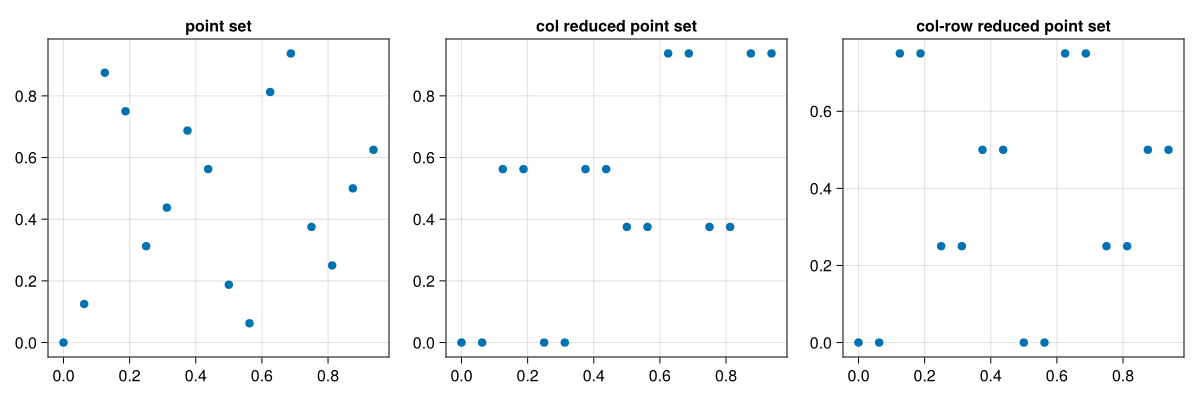

In [45]:
fig = Figure(resolution = (1200, 400))
ax = Axis(fig[1,1], title = "point set")
scatter!( Point2.(pts) )

ax = Axis(fig[1,2], title = "col reduced point set")
scatter!( Point2.(pts_cr) )

ax = Axis(fig[1,3], title = "col-row reduced point set")
scatter!( Point2.(pts_rr) )
fig

Computing the NRT-weight and Dual space

In [49]:
1+2^5+2^10+2^15

33825

In [19]:
dual_badic = collect(Iterators.product(fill(0:b-1, m*s)...))[:]

729-element Vector{NTuple{6, Int64}}:
 (0, 0, 0, 0, 0, 0)
 (1, 0, 0, 0, 0, 0)
 (2, 0, 0, 0, 0, 0)
 (0, 1, 0, 0, 0, 0)
 (1, 1, 0, 0, 0, 0)
 (2, 1, 0, 0, 0, 0)
 (0, 2, 0, 0, 0, 0)
 (1, 2, 0, 0, 0, 0)
 (2, 2, 0, 0, 0, 0)
 (0, 0, 1, 0, 0, 0)
 ⋮
 (0, 0, 2, 2, 2, 2)
 (1, 0, 2, 2, 2, 2)
 (2, 0, 2, 2, 2, 2)
 (0, 1, 2, 2, 2, 2)
 (1, 1, 2, 2, 2, 2)
 (2, 1, 2, 2, 2, 2)
 (0, 2, 2, 2, 2, 2)
 (1, 2, 2, 2, 2, 2)
 (2, 2, 2, 2, 2, 2)

In [20]:
function nrt_wt(v,m,s,b)
    wt = 0
    for i in 0:m:(m*s -1)
        for j in m:-1:1         #reverse(1:m)
            if v[i+j] != 0
                wt += j
                break
            end
        end
    end
    return wt
end

nrt_wt (generic function with 1 method)

In [21]:
nrt_wt.(dual_badic,3,2,3)

729-element Vector{Int64}:
 0
 1
 1
 2
 2
 2
 2
 2
 2
 3
 ⋮
 6
 6
 6
 6
 6
 6
 6
 6
 6

In [22]:
wt_dict = Dict()
    for x in dual_badic
        wt = nrt_wt(x,m,s,b)
        if haskey(wt_dict,wt)
            push!(wt_dict[wt],x)
        else 
            wt_dict[wt] = [x]
        end
    end 

In [23]:
function dual_C(M,b,m,s)
    dual_elt = []
    for n in dual_badic
        if transpose(collect(n))*M == [0 0 0] 
            dual_elt = push!(dual_elt, n)
        end
    end
    return dual_elt
end

dual_C (generic function with 1 method)

In [24]:
M = [C_1;C_2]
# transpose(collect(dual_badic[64]))*M == [0 0 0] 

6×3 Matrix{AbstractAlgebra.GFElem{Int64}}:
 1  1  1
 0  1  2
 0  0  1
 1  2  1
 0  1  1
 0  0  1

In [25]:
dual_pts = dual_C(M,3,3,2)

27-element Vector{Any}:
 (0, 0, 0, 0, 0, 0)
 (2, 2, 2, 1, 0, 0)
 (1, 1, 1, 2, 0, 0)
 (0, 2, 1, 0, 1, 0)
 (2, 1, 0, 1, 1, 0)
 (1, 0, 2, 2, 1, 0)
 (0, 1, 2, 0, 2, 0)
 (2, 0, 1, 1, 2, 0)
 (1, 2, 0, 2, 2, 0)
 (0, 0, 2, 0, 0, 1)
 ⋮
 (0, 0, 1, 0, 0, 2)
 (2, 2, 0, 1, 0, 2)
 (1, 1, 2, 2, 0, 2)
 (0, 2, 2, 0, 1, 2)
 (2, 1, 1, 1, 1, 2)
 (1, 0, 0, 2, 1, 2)
 (0, 1, 0, 0, 2, 2)
 (2, 0, 2, 1, 2, 2)
 (1, 2, 1, 2, 2, 2)

In [26]:
M_r = [C_r1; C_r2]

6×3 Matrix{AbstractAlgebra.GFElem{Int64}}:
 1  1  0
 0  1  0
 0  0  0
 1  2  0
 0  1  0
 0  0  0

In [27]:
dual_pts_r = dual_C(M_r,3,3,2)

81-element Vector{Any}:
 (0, 0, 0, 0, 0, 0)
 (0, 0, 1, 0, 0, 0)
 (0, 0, 2, 0, 0, 0)
 (2, 2, 0, 1, 0, 0)
 (2, 2, 1, 1, 0, 0)
 (2, 2, 2, 1, 0, 0)
 (1, 1, 0, 2, 0, 0)
 (1, 1, 1, 2, 0, 0)
 (1, 1, 2, 2, 0, 0)
 (0, 2, 0, 0, 1, 0)
 ⋮
 (0, 1, 0, 0, 2, 2)
 (0, 1, 1, 0, 2, 2)
 (0, 1, 2, 0, 2, 2)
 (2, 0, 0, 1, 2, 2)
 (2, 0, 1, 1, 2, 2)
 (2, 0, 2, 1, 2, 2)
 (1, 2, 0, 2, 2, 2)
 (1, 2, 1, 2, 2, 2)
 (1, 2, 2, 2, 2, 2)

In [28]:
wt_dict_dual = Dict()
    for x in dual_pts
        wt = nrt_wt(x,m,s,b)
        if haskey(wt_dict_dual,wt)
            push!(wt_dict_dual[wt],x)
        else 
            wt_dict_dual[wt] = [x]
        end
    end 

In [34]:
wt_dict_dual[4]

6-element Vector{NTuple{6, Int64}}:
 (2, 2, 2, 1, 0, 0)
 (1, 1, 1, 2, 0, 0)
 (2, 1, 0, 1, 1, 0)
 (1, 2, 0, 2, 2, 0)
 (2, 0, 0, 1, 2, 1)
 (1, 0, 0, 2, 1, 2)

In [30]:
wt_dict_dual_r = Dict()
    for x in dual_pts_r
        wt = nrt_wt(x,m,s,b)
        if haskey(wt_dict_dual_r,wt)
            push!(wt_dict_dual_r[wt],x)
        else 
            wt_dict_dual_r[wt] = [x]
        end
    end 

In [36]:
wt_dict_dual_r[4]

12-element Vector{NTuple{6, Int64}}:
 (2, 2, 1, 1, 0, 0)
 (2, 2, 2, 1, 0, 0)
 (1, 1, 1, 2, 0, 0)
 (1, 1, 2, 2, 0, 0)
 (0, 2, 0, 0, 1, 0)
 (2, 1, 0, 1, 1, 0)
 (0, 1, 0, 0, 2, 0)
 (1, 2, 0, 2, 2, 0)
 (1, 0, 0, 2, 1, 1)
 (2, 0, 0, 1, 2, 1)
 (1, 0, 0, 2, 1, 2)
 (2, 0, 0, 1, 2, 2)